## Load workspace

In [1]:
#save.image(file = "DESeq2_notebook.RData")
load("DESeq2_trimmed_notebook_CELseq_bleb.RData")

## Load libraries

In [2]:
suppressPackageStartupMessages({library(Rsubread)
                                library(DESeq2)
                                library("dplyr")
                                library("ggplot2")
                                library("pheatmap")
                                library("RColorBrewer")
                                library(AnnotationDbi)
                                library(org.Dr.eg.db)
                                library(repr)
                                library(topGO)
                                library(GOstats)
                               })

library(GOstats)


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



In [3]:
# set size of plot windows
options(repr.plot.width=12, repr.plot.height=10)

Did not remove duplicated reads although there are UMIs general advice from Anika is that these haven't been useful in bulk as they saturate quickly. #may check eventually if this is the case here when we have low read recover.
Reads were mapped to danrer11 with STAR.
Here following the RNA-seq workflow from bioconductor: https://www.bioconductor.org/packages/devel/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html

## Rsubread
First create count matrix with Rsubread: https://bioconductor.org/packages/3.12/bioc/vignettes/Rsubread/inst/doc/Rsubread.pdf

ThefeatureCountsfunction  is  a  general-purpose  read  summarization  function  thatassigns mapped reads (RNA-seq or gDNA-seq reads) to genomic features such as genes,exons, promoters, gene bodies and genomic windows.This function takes as input a set of files that contain read mapping results and anannotation file that includes genomic features.  It automatically detects the format ofinput read files (supported formats include SAM and BAM). Input reads can be name-sorted or location-sorted.  Users do not need to resort the reads before feeding them to featureCounts.

In [4]:
#?list.files
#bamfiles<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed", pattern= "*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)

In [5]:
# select only bleb and dmso files
bamfiles<-c(
'/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample1/sample1.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample10/sample10.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample12/sample12.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample2/sample2.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample3/sample3.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample4/sample4.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample5/sample5.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample6/sample6.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample7/sample7.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample8/sample8.Aligned.out.bam',
    '/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample9/sample9.Aligned.out.bam'
)
bamfiles

[1] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample1/sample1.Aligned.out.bam"  
 [2] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample10/sample10.Aligned.out.bam"
 [3] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample12/sample12.Aligned.out.bam"
 [4] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample2/sample2.Aligned.out.bam"  
 [5] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample3/sample3.Aligned.out.bam"  
 [6] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample4/sample4.Aligned.out.bam"  
 [7] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample5/sample5.Aligned.out.bam"  
 [8] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample6/sample6.Aligned.out.bam"  
 [9] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample7/sample7.Aligned.out.bam"  
[10] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample8/sample8.Aligned.out.bam"  
[11] "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample9/sample9.Aligned.out.bam"

In [6]:
mycounts <- featureCounts(bamfiles, annot.ext="/fast/AG_Ohler/Alison/reference_genomes/danrer11/Danio_rerio.GRCz11.100.gtf", isGTFAnnotationFile=TRUE, isPairedEnd=FALSE, countMultiMappingReads = FALSE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.3.9

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 11 BAM files                                     ||
||                                                                            ||
||                           sample1.Aligned.out.bam                          ||
||                           sample10.Aligned.out.bam                         ||
||                           sample12.Aligned.out.bam

In [7]:
summary(mycounts)
#dim(mycounts$counts)
#head(mycounts$annotation)
#mycounts$targets
#mycounts$stat

           Length Class      Mode     
counts     357720 -none-     numeric  
annotation      6 data.frame list     
targets        11 -none-     character
stat           12 data.frame list     

## Import count matrix into DESeq2
Now import count matrix into DESeq2 with DESeqDataSetFromMatrix (see 3.2 Starting from count matrices)
Batches were given by Anne Merks. Could be divided based on embryonic clutches but this is unbalanced for the second expt because different embryonic lines were used, and also when the experiment was performed.
Experiment batches won't be used for selection of DE genes so can't be included in design formula. Decide whether it is better to analyse them separately or all together (first inclination is together, to allow more borrowed information).
* Here I'm taking only the bleb and DMSO conditions to normalise*

In [8]:
countData<-mycounts$counts
colData<-read.csv("/fast/AG_Ohler/Alison/panakova_CM_RNAseq/mapped_trimmed_samplesheet_batches.txt", sep="\t", header=TRUE)
colData<-colData[colData$condition=="dmso" | colData$condition=="bleb",]
colData

,path,samplename,condition,embryo_batch,expt_batch
,<chr>,<chr>,<chr>,<chr>,<chr>
1,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample1/sample1.Aligned.out.bam,sample1,dmso,bleb_expt_batch1,bleb_expt
2,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample10/sample10.Aligned.out.bam,sample10,bleb,bleb_expt_batch1,bleb_expt
3,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample12/sample12.Aligned.out.bam,sample12,bleb,bleb_expt_batch1,bleb_expt
10,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample2/sample2.Aligned.out.bam,sample2,dmso,bleb_expt_batch1,bleb_expt
16,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample3/sample3.Aligned.out.bam,sample3,dmso,bleb_expt_batch1,bleb_expt
17,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample4/sample4.Aligned.out.bam,sample4,dmso,bleb_expt_batch1,bleb_expt
18,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample5/sample5.Aligned.out.bam,sample5,dmso,bleb_expt_batch1,bleb_expt
19,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample6/sample6.Aligned.out.bam,sample6,dmso,bleb_expt_batch1,bleb_expt
20,/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped_trimmed/sample7/sample7.Aligned.out.bam,sample7,bleb,bleb_expt_batch1,bleb_expt


In [9]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                                 colData = colData,
                                 design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [10]:
colData(dds)

DataFrame with 11 rows and 5 columns
                                           path  samplename condition
                                    <character> <character>  <factor>
sample1.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample1      dmso
sample10.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample10      bleb
sample12.Aligned.out.bam /fast/AG_Ohler/Aliso..    sample12      bleb
sample2.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample2      dmso
sample3.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample3      dmso
sample4.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample4      dmso
sample5.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample5      dmso
sample6.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample6      dmso
sample7.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample7      bleb
sample8.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample8      bleb
sample9.Aligned.out.bam  /fast/AG_Ohler/Aliso..     sample9      bleb
                             embryo_batch  expt_batch

## Exploratory analysis and visualization

### Prefiltering the dataset
Removing rows with no counts or only a single count across all samples.
NB may come back and adjust this

In [11]:
nrow(dds)

[1] 32520

In [12]:
keep <- rowSums(counts(dds)) > 1
# at least 3 samples with a count of 10 or higher
#keep <- rowSums(counts(dds) >= 1) >= 3
dds <- dds[keep,]
nrow(dds)

[1] 20748

### select samples with significant counts
Without any filtering of samples with low counts - samples 2, 5, 23, 3, 9, 14, 21, 22 cluster separately.

In [13]:
colSums(counts(dds))

sample1.Aligned.out.bam sample10.Aligned.out.bam sample12.Aligned.out.bam 
                  862335                  1764492                  2343510 
 sample2.Aligned.out.bam  sample3.Aligned.out.bam  sample4.Aligned.out.bam 
                  126194                     8657                   680602 
 sample5.Aligned.out.bam  sample6.Aligned.out.bam  sample7.Aligned.out.bam 
                    8636                  1476163                  1747201 
 sample8.Aligned.out.bam  sample9.Aligned.out.bam 
                 1091156                    13522

In [14]:
colSums(counts(dds[,colSums(counts(dds)) < 150000]))

sample2.Aligned.out.bam sample3.Aligned.out.bam sample5.Aligned.out.bam 
                 126194                    8657                    8636 
sample9.Aligned.out.bam 
                  13522

The above samples that clustered separately all have low readcounts, and very poor general QC, such as read quality etc. If I don't remove these samples with low counts, I only see 129 bled vs dmso genes and 1 vangl2 vs wt gene

In [15]:
keep2 <- colSums(counts(dds)) > 150000
dds <- dds[,keep2]
ncol(dds)

[1] 7

Sample 19 should also be removed. It was one of the non-standard barcodes that had one basepair mismatch with sample19's expected barcoed. However the read quality is poor, and it clusters with the dmso samples rather than the vangl samples so it should be removed as it may introduce erronious DE genes.

In [16]:
keep3 <- colnames(dds) != "sample19.Aligned.out.bam"
keep3
dds <- dds[,keep3]
ncol(dds)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] 7

##  The variance stabilizing transformation and the rlog

Normalization here is aimed to stabilise the variance across the mean, for the purposes of plotting. If you just take counts, the largest counts have the highest absolute variance. If you take log2+1 of counts, the smaller counts will be over-represented in the variance.
DESeq2 has two methods to deal with this now - VST and rlog.
The rlog tends to work well on small datasets (n < 30), potentially outperforming the VST when there is a wide range of sequencing depth across samples (an order of magnitude difference).
=> Use rlog here, but it takes longer to compute

In [17]:
vsd <- vst(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(vsd), 3)

,sample1.Aligned.out.bam,sample10.Aligned.out.bam,sample12.Aligned.out.bam,sample4.Aligned.out.bam,sample6.Aligned.out.bam,sample7.Aligned.out.bam,sample8.Aligned.out.bam
ENSDARG00000114503,5.085201,5.085201,5.085201,5.411934,5.322576,5.085201,5.085201
ENSDARG00000115971,5.085201,5.298485,5.268185,5.085201,5.085201,5.085201,5.085201
ENSDARG00000098311,5.366179,5.298485,5.085201,5.085201,5.085201,5.085201,5.085201


In [18]:
rld <- rlog(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(rld), 3)

,sample1.Aligned.out.bam,sample10.Aligned.out.bam,sample12.Aligned.out.bam,sample4.Aligned.out.bam,sample6.Aligned.out.bam,sample7.Aligned.out.bam,sample8.Aligned.out.bam
ENSDARG00000114503,-1.628534,-1.641488,-1.646055,-1.574556,-1.589581,-1.640587,-1.627506
ENSDARG00000115971,-1.670501,-1.650908,-1.656534,-1.666401,-1.675079,-1.677461,-1.669907
ENSDARG00000098311,-1.586823,-1.597499,-1.639730,-1.619609,-1.631992,-1.635393,-1.624612


Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


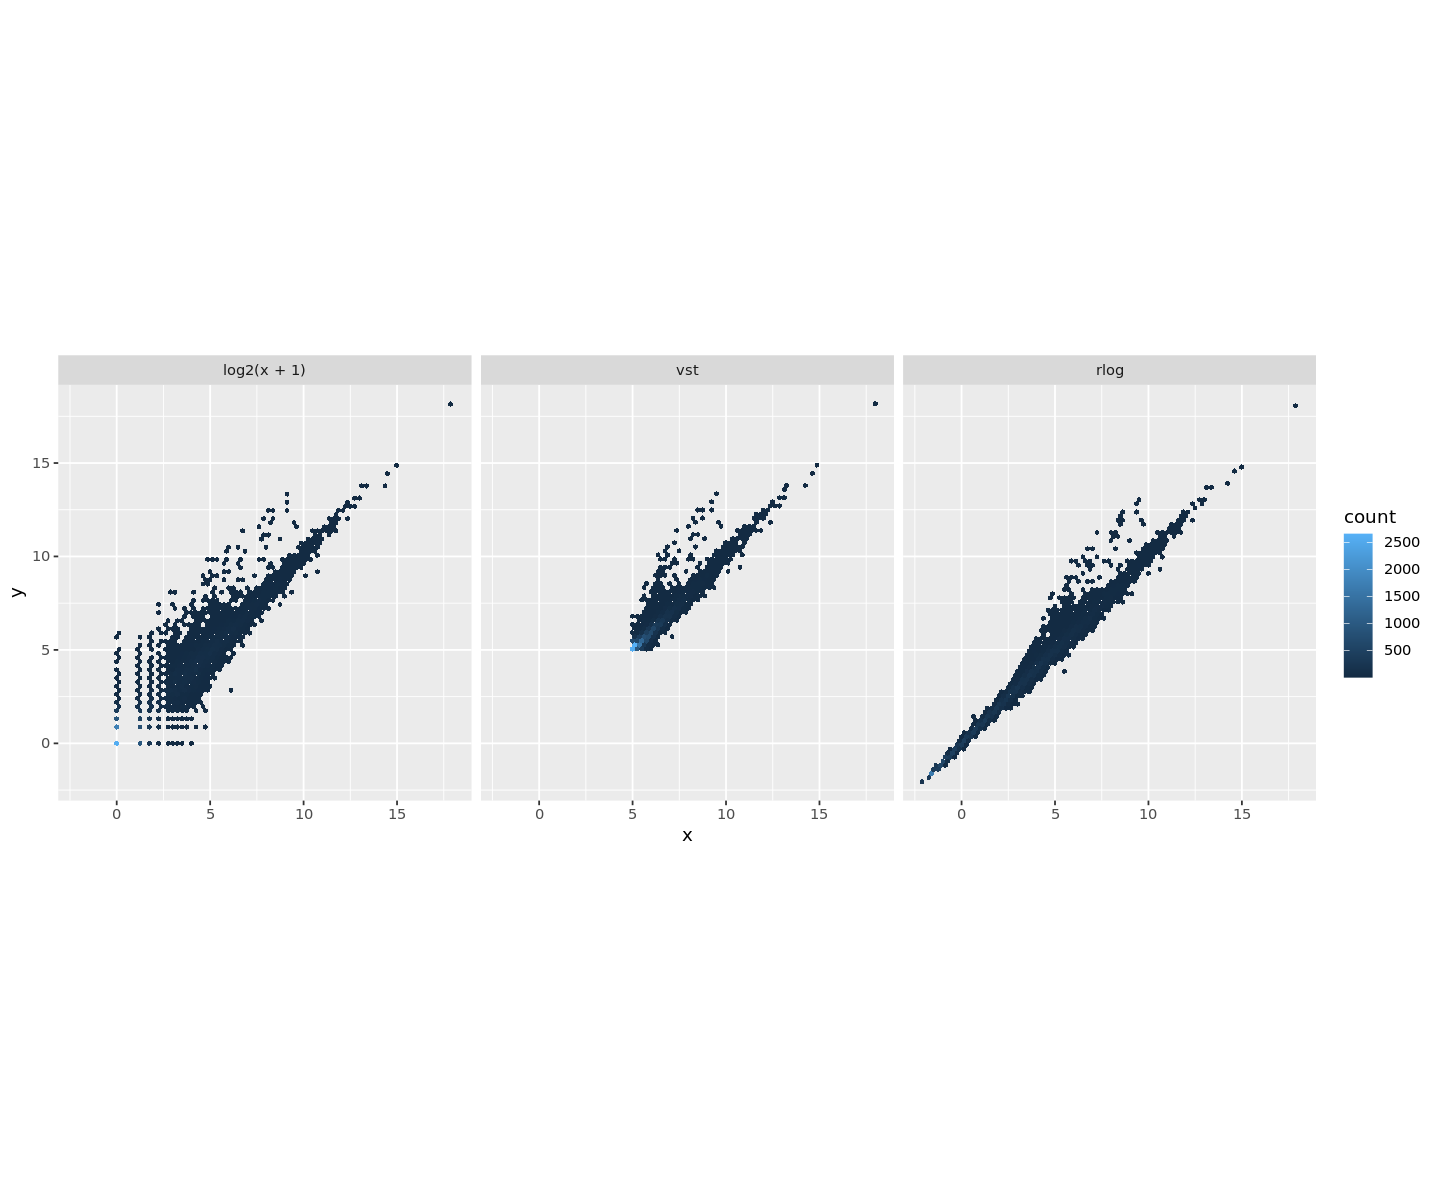

In [19]:
library("dplyr")
library("ggplot2")

dds <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("x", "y")  

lvls <- c("log2(x + 1)", "vst", "rlog")
df$transformation <- factor(df$transformation, levels=lvls)

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)  

In [20]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists

In [21]:
library("pheatmap")
library("RColorBrewer")

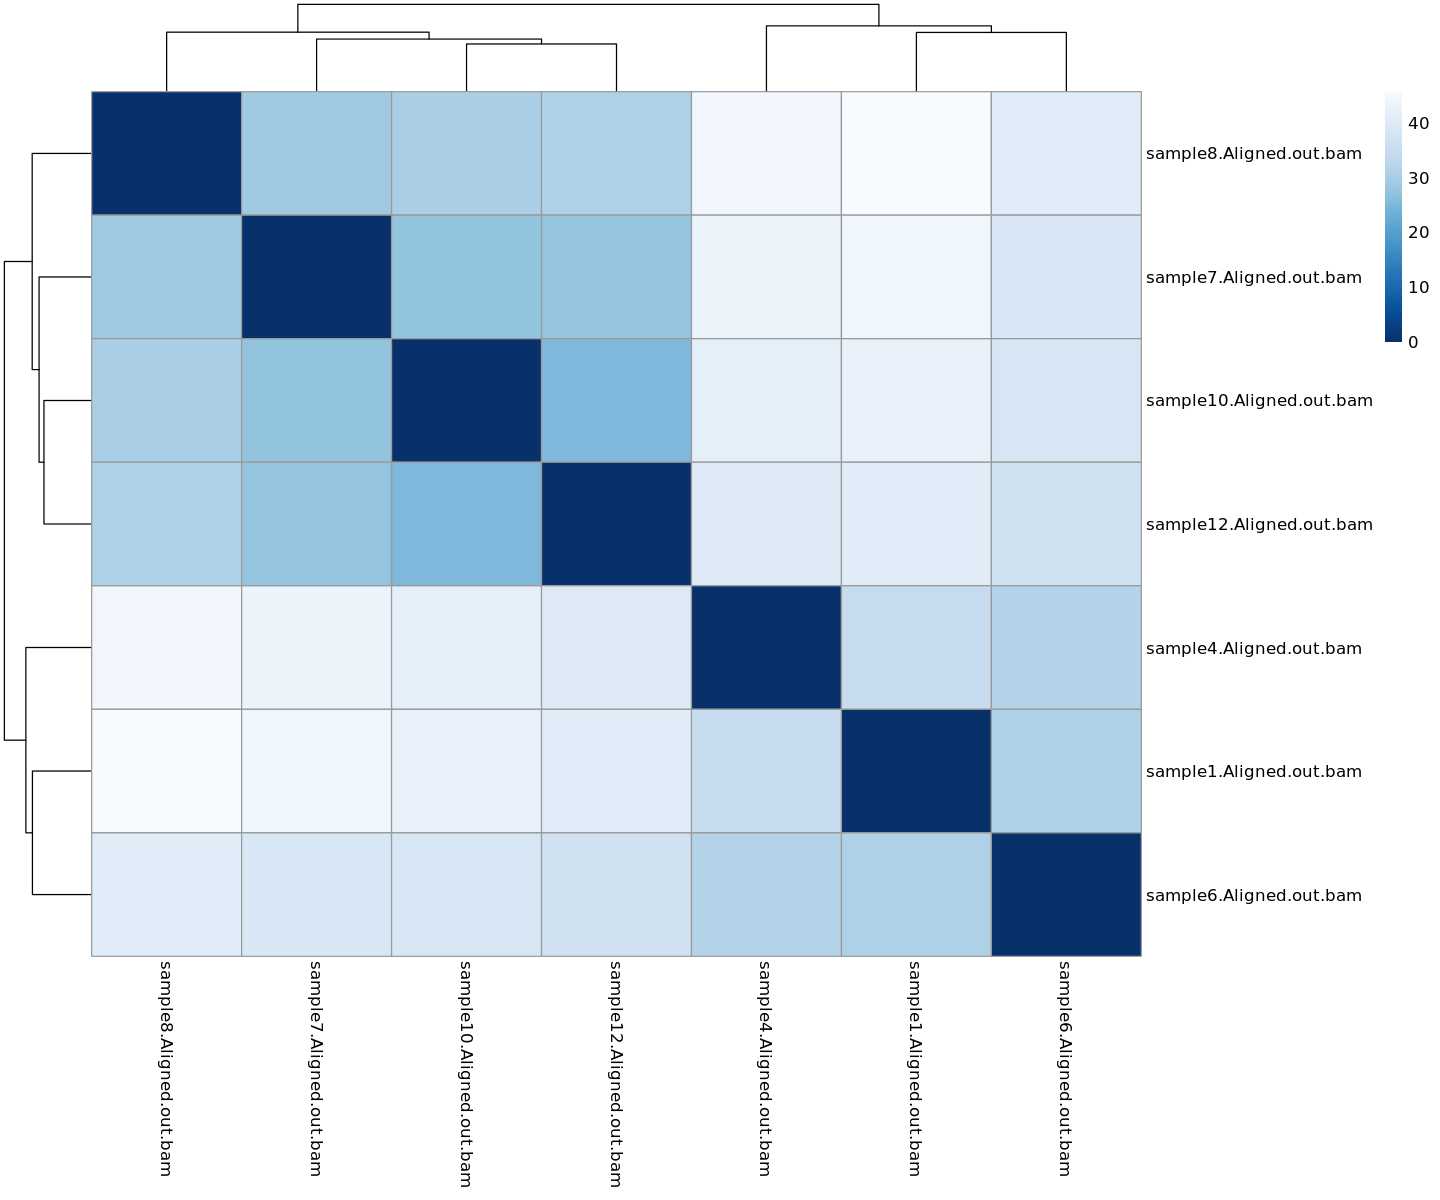

In [22]:
sampleDistMatrix <- as.matrix( sampleDists )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

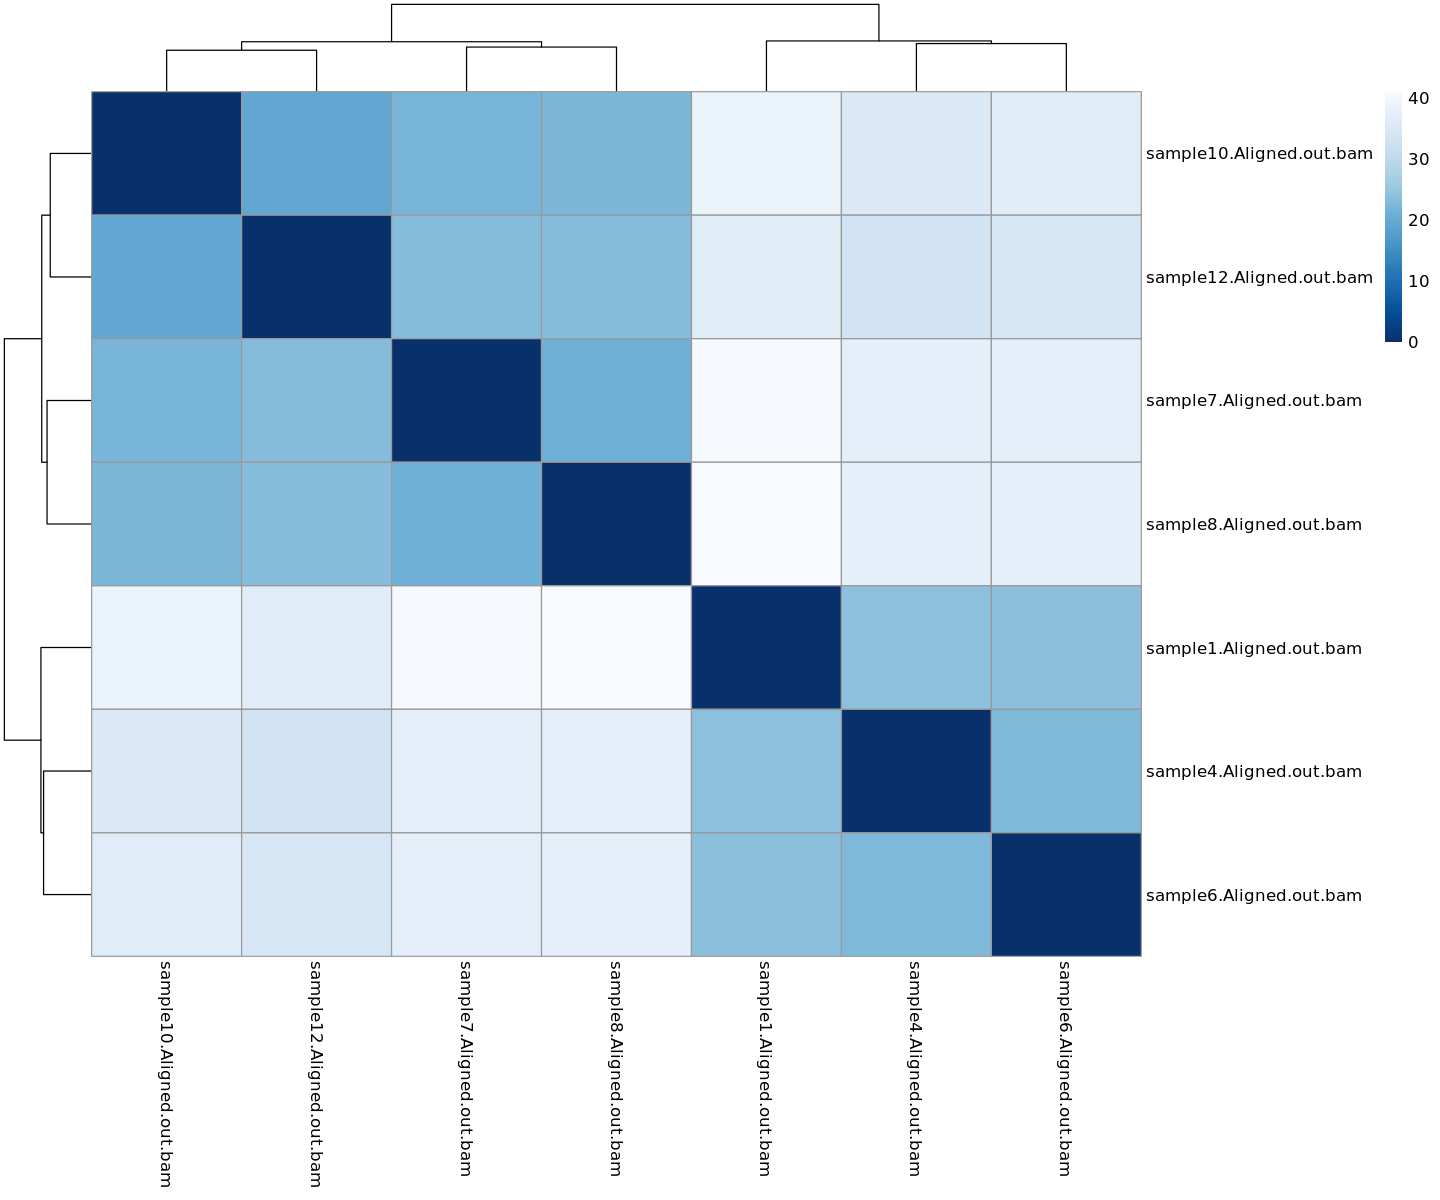

In [23]:
sampleDists_rld <- dist(t(assay(rld)))
sampleDistMatrix_rld <- as.matrix( sampleDists_rld )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix_rld,
         clustering_distance_rows = sampleDists_rld,
         clustering_distance_cols = sampleDists_rld,
         col = colors)

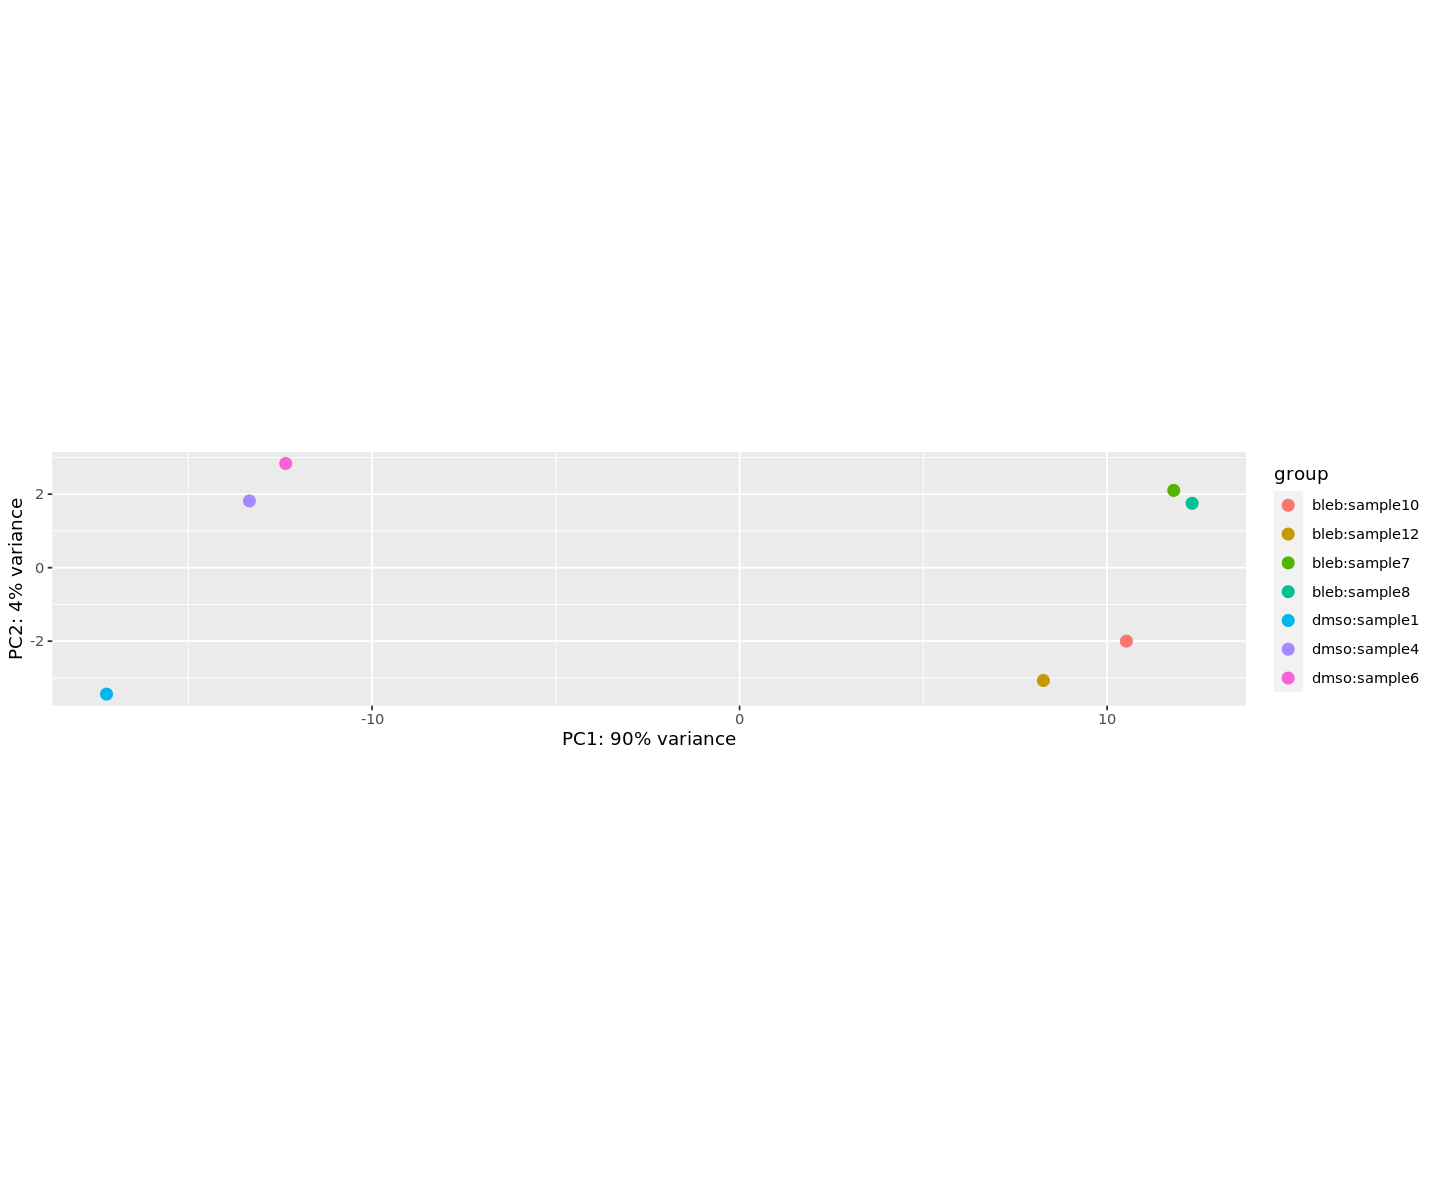

In [24]:
plotPCA(vsd, intgroup=c("condition","samplename"))
# add sample names

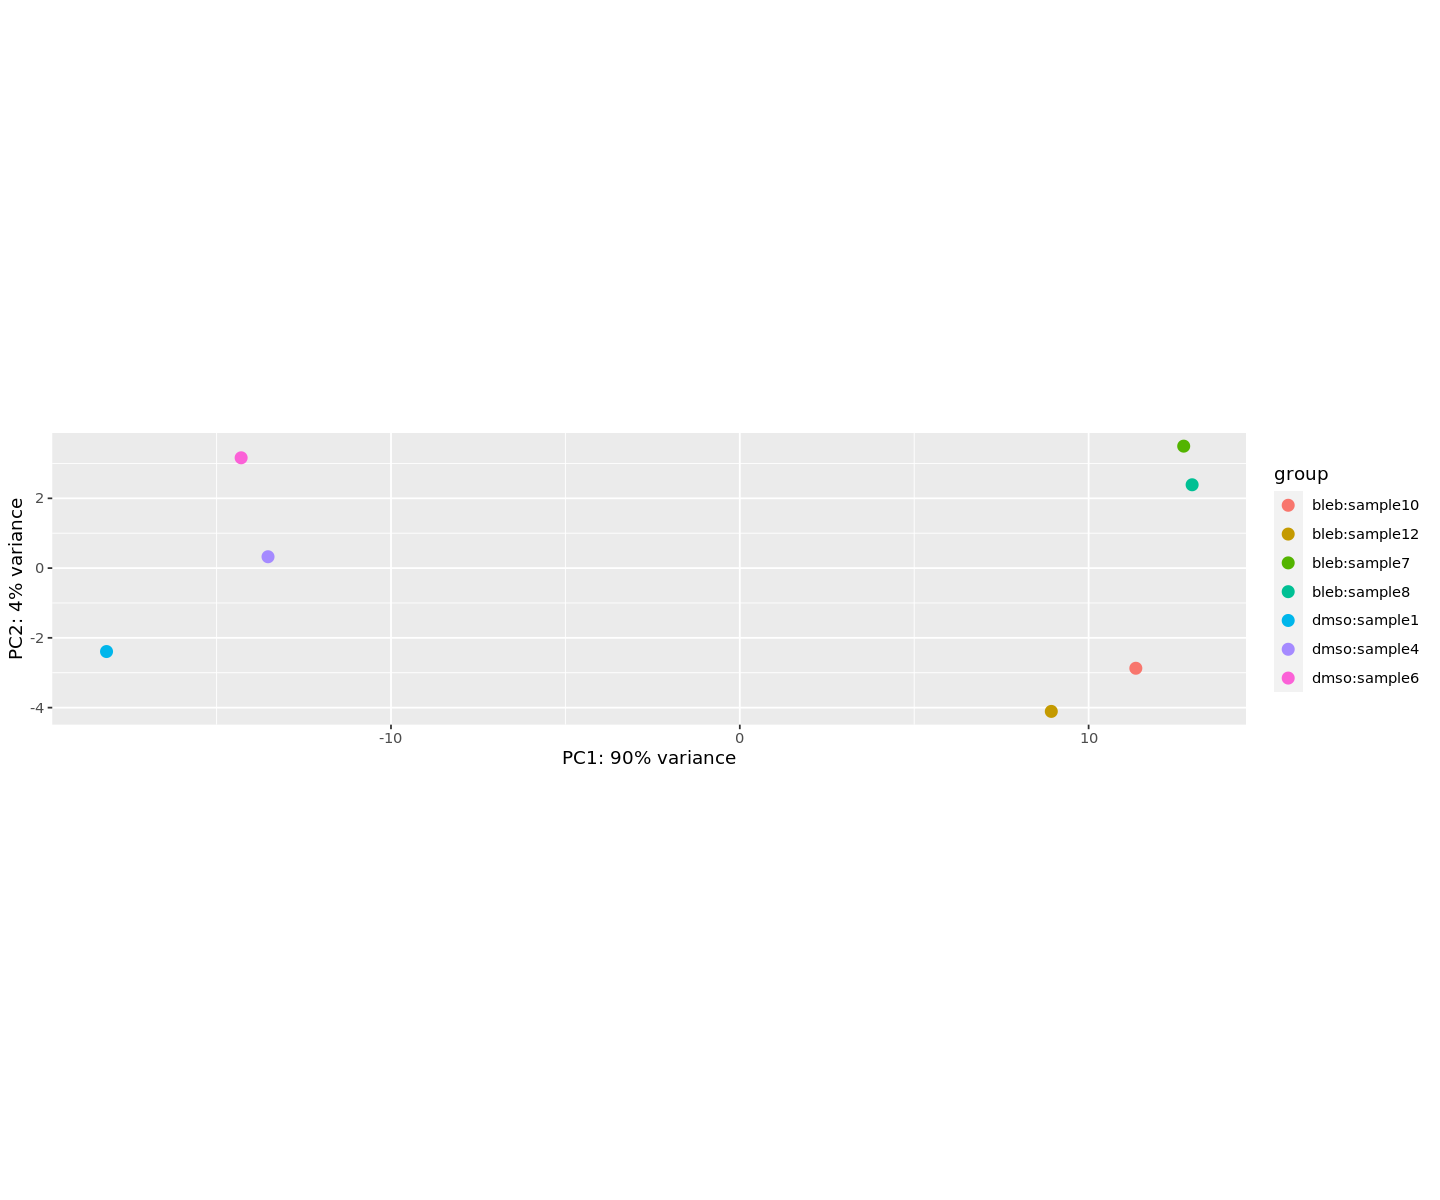

In [25]:
plotPCA(rld, intgroup=c("condition","samplename"))

## Differential expression analysis
As we have already specified an experimental design when we created the DESeqDataSet, we can run the differential expression pipeline on the raw counts with a single call to the function DESeq:

This function will print out a message for the various steps it performs. These are described in more detail in the manual page for DESeq, which can be accessed by typing ?DESeq. Briefly these are: the estimation of size factors (controlling for differences in the sequencing depth of the samples), the estimation of dispersion values for each gene, and fitting a generalized linear model.

A DESeqDataSet is returned that contains all the fitted parameters within it, and the following section describes how to extract out results tables of interest from this object.

In [26]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [27]:
res <- results(dds, contrast=c("condition","bleb","dmso"))
res

log2 fold change (MLE): condition bleb vs dmso 
Wald test p-value: condition bleb vs dmso 
DataFrame with 20748 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat    pvalue
                   <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSDARG00000114503  0.381382      -2.545628  2.791021 -0.912078 0.3617278
ENSDARG00000115971  0.184302       0.697932  3.667402  0.190307 0.8490687
ENSDARG00000098311  0.290713      -0.902430  3.116827 -0.289535 0.7721721
ENSDARG00000104839  1.332620      -1.725761  1.629191 -1.059274 0.2894749
ENSDARG00000102474 54.970535       0.581587  0.263058  2.210866 0.0270451
...                      ...            ...       ...       ...       ...
ENSDARG00000104316  51.46064      0.0288091  0.254599  0.113155  0.909908
ENSDARG00000115161   2.30001      1.2933843  1.226339  1.054672  0.291576
ENSDARG00000113284   3.65448      0.1827084  0.907123  0.201415  0.840374
ENSDARG00000103580   1.29789      0.9120161  1.662544  

### select significant genes between bleb and dmso
If I don't remove samples with low counts I only get 129 diff genes

In [28]:
#sum(res$padj < 0.05, na.rm=TRUE)
resSig <- subset(res, padj < 0.05)
resSig <- subset(resSig, abs(log2FoldChange) > 1)
dim(resSig)
sum(resSig$log2FoldChange > 0, na.rm=TRUE)
sum(resSig$log2FoldChange < 0, na.rm=TRUE)

[1] 397   6

[1] 371

[1] 26

In [29]:

head(resSig[ order(-resSig$log2FoldChange), ])

log2 fold change (MLE): condition bleb vs dmso 
Wald test p-value: condition bleb vs dmso 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000018264  16.98700        5.12163  1.072430   4.77573 1.79059e-06
ENSDARG00000046079   8.30762        4.94208  1.284383   3.84783 1.19171e-04
ENSDARG00000045633   6.26053        4.55167  1.311235   3.47129 5.17968e-04
ENSDARG00000059003   5.61694        4.37067  1.312627   3.32971 8.69373e-04
ENSDARG00000033854   8.86678        4.13072  1.109090   3.72442 1.95762e-04
ENSDARG00000067995 227.49039        4.01562  0.234884  17.09620 1.58414e-65
                          padj
                     <numeric>
ENSDARG00000018264 6.33649e-05
ENSDARG00000046079 2.63575e-03
ENSDARG00000045633 9.63686e-03
ENSDARG00000059003 1.50149e-02
ENSDARG00000033854 4.07995e-03
ENSDARG00000067995 6.86726e-63

annotate genes with gene names

In [30]:
library(AnnotationDbi)
library(org.Dr.eg.db)

In [31]:
columns(org.Dr.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "ONTOLOGY"     "ONTOLOGYALL" 
[16] "PATH"         "PFAM"         "PMID"         "PROSITE"      "REFSEQ"      
[21] "SYMBOL"       "UNIGENE"      "UNIPROT"      "ZFIN"

In [32]:
#ens.str <- substr(rownames(res), 1)
ens.str <- substr(rownames(res), 1, length(rownames(res)))
res$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [33]:
#ens.str <- substr(rownames(res), 1, length(rownames(res)))
resSig <- subset(res, padj < 0.05)
resSig <- subset(resSig, abs(log2FoldChange) > 1)


### plot heat maps with top and bottom DE genes

In [34]:
#select top and bottom most differential genes
topBotDEGenes<-rbind(head(resSig[ order(-resSig$log2FoldChange), ], 15),
                       head(resSig[ order(resSig$log2FoldChange), ], 15))
#head(topBotDEGenes, 20)

In [35]:
# select blab and dmso samples
blebdmso_samples<-colData(vsd)[vsd$condition == "bleb" | vsd$condition == "dmso",]

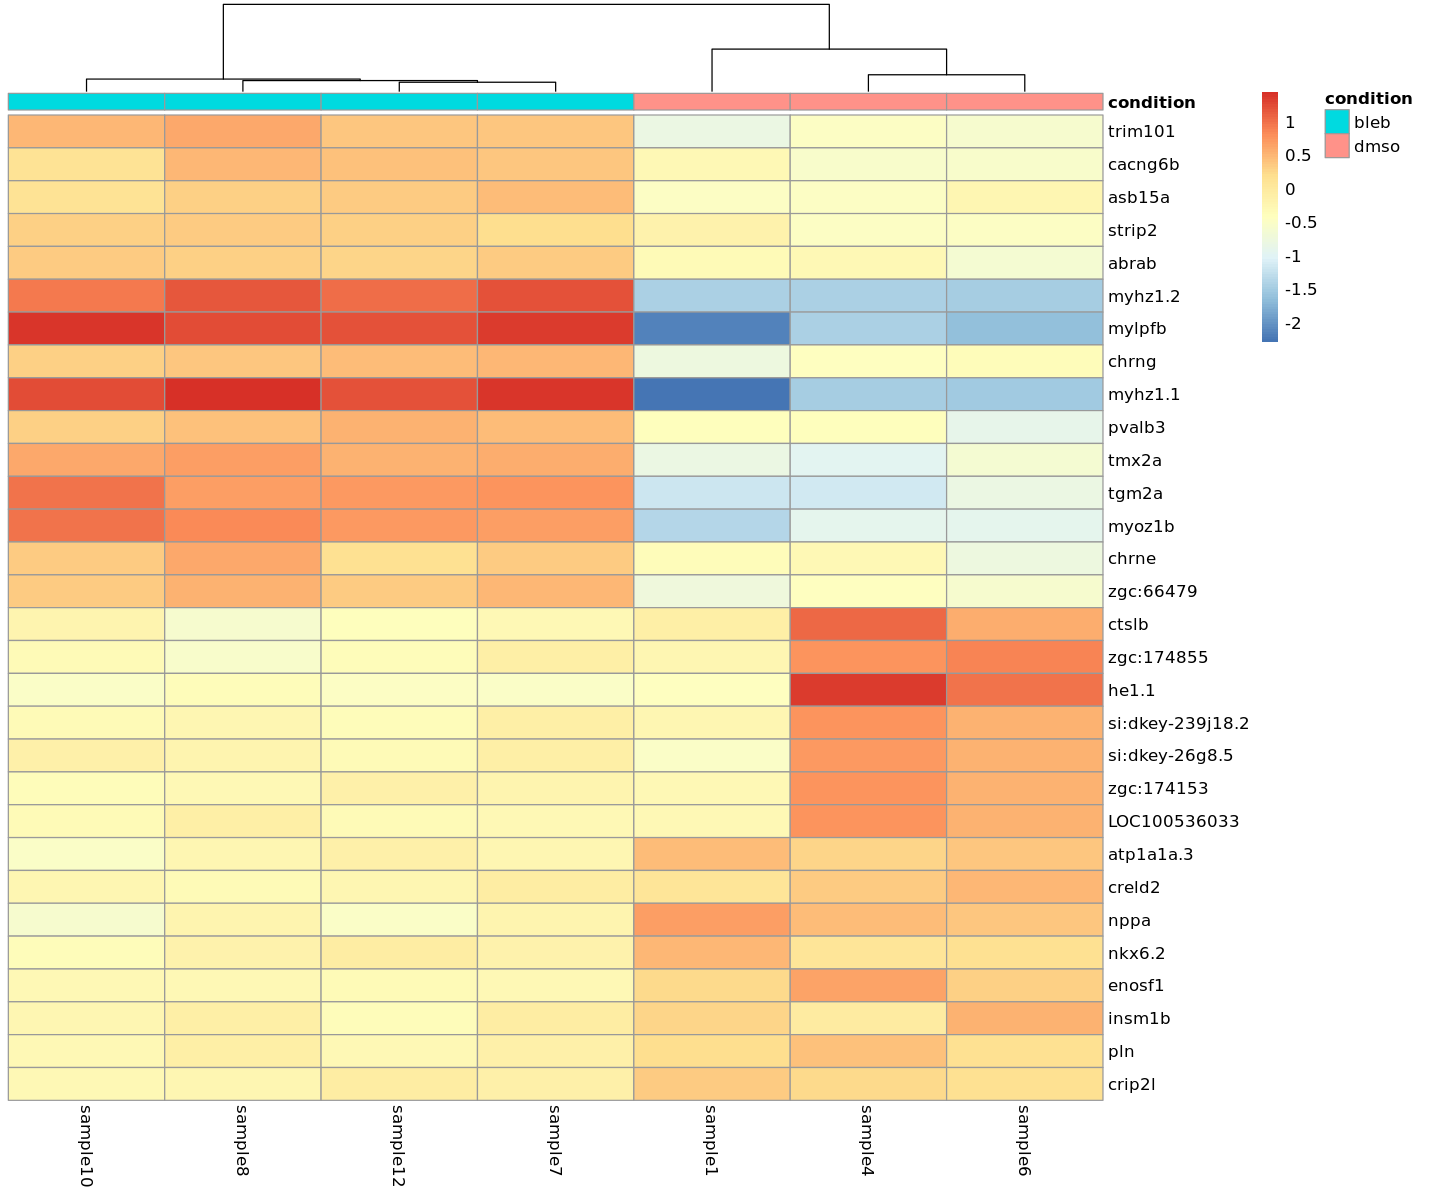

In [36]:
mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(blebdmso_samples)])
mat  <- mat - rowMeans(mat)
anno <- as.data.frame(colData(vsd)[rownames(blebdmso_samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
library(pheatmap)
labels_col = c(colData(vsd)[rownames(blebdmso_samples), "samplename"])
labels_row = c(topBotDEGenes$symbol)
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = "deseq2_trimmed_outputs_CELseq_bleb/topbot15heatmap_bleb_dmso.png")
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = "deseq2_trimmed_outputs_CELseq_bleb/topbot15heatmap_bleb_dmso.pdf")

#### Heatmap with all DE genes between samples

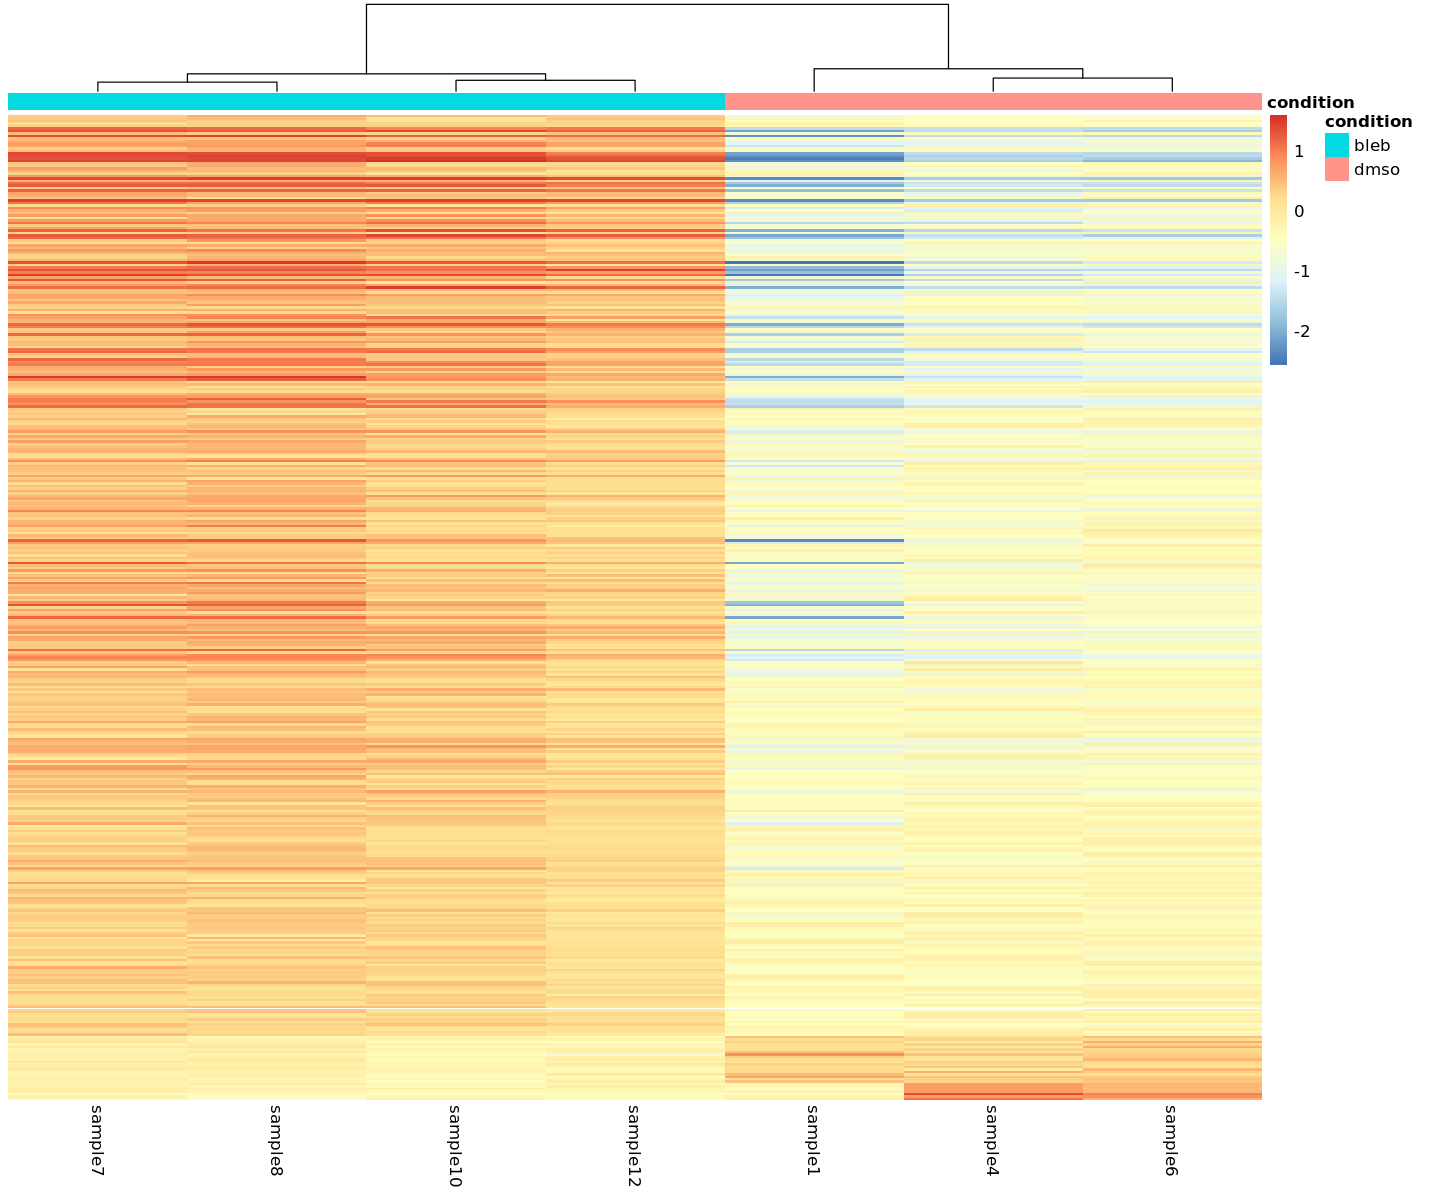

In [37]:
allDEGenes<-resSig[ order(-resSig$log2FoldChange), ]

matall<-(assay(vsd)[rownames(allDEGenes), rownames(blebdmso_samples)])
matall  <- matall - rowMeans(matall)
anno <- as.data.frame(colData(vsd)[rownames(blebdmso_samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
library(pheatmap)
labels_col = c(colData(vsd)[rownames(blebdmso_samples), "samplename"])
pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE)
pheatmap(matall, annotation_col = anno, labels_col = labels_col, cluster_rows=FALSE, show_rownames=FALSE, filename = "deseq2_trimmed_outputs_CELseq_bleb/allDEpadj0.1heatmap_bleb_dmso.pdf")

In [38]:
#?pheatmap

## Volcano plot

[1] 8670    8

Warning message:
“Removed 8633 rows containing missing values (geom_text).”


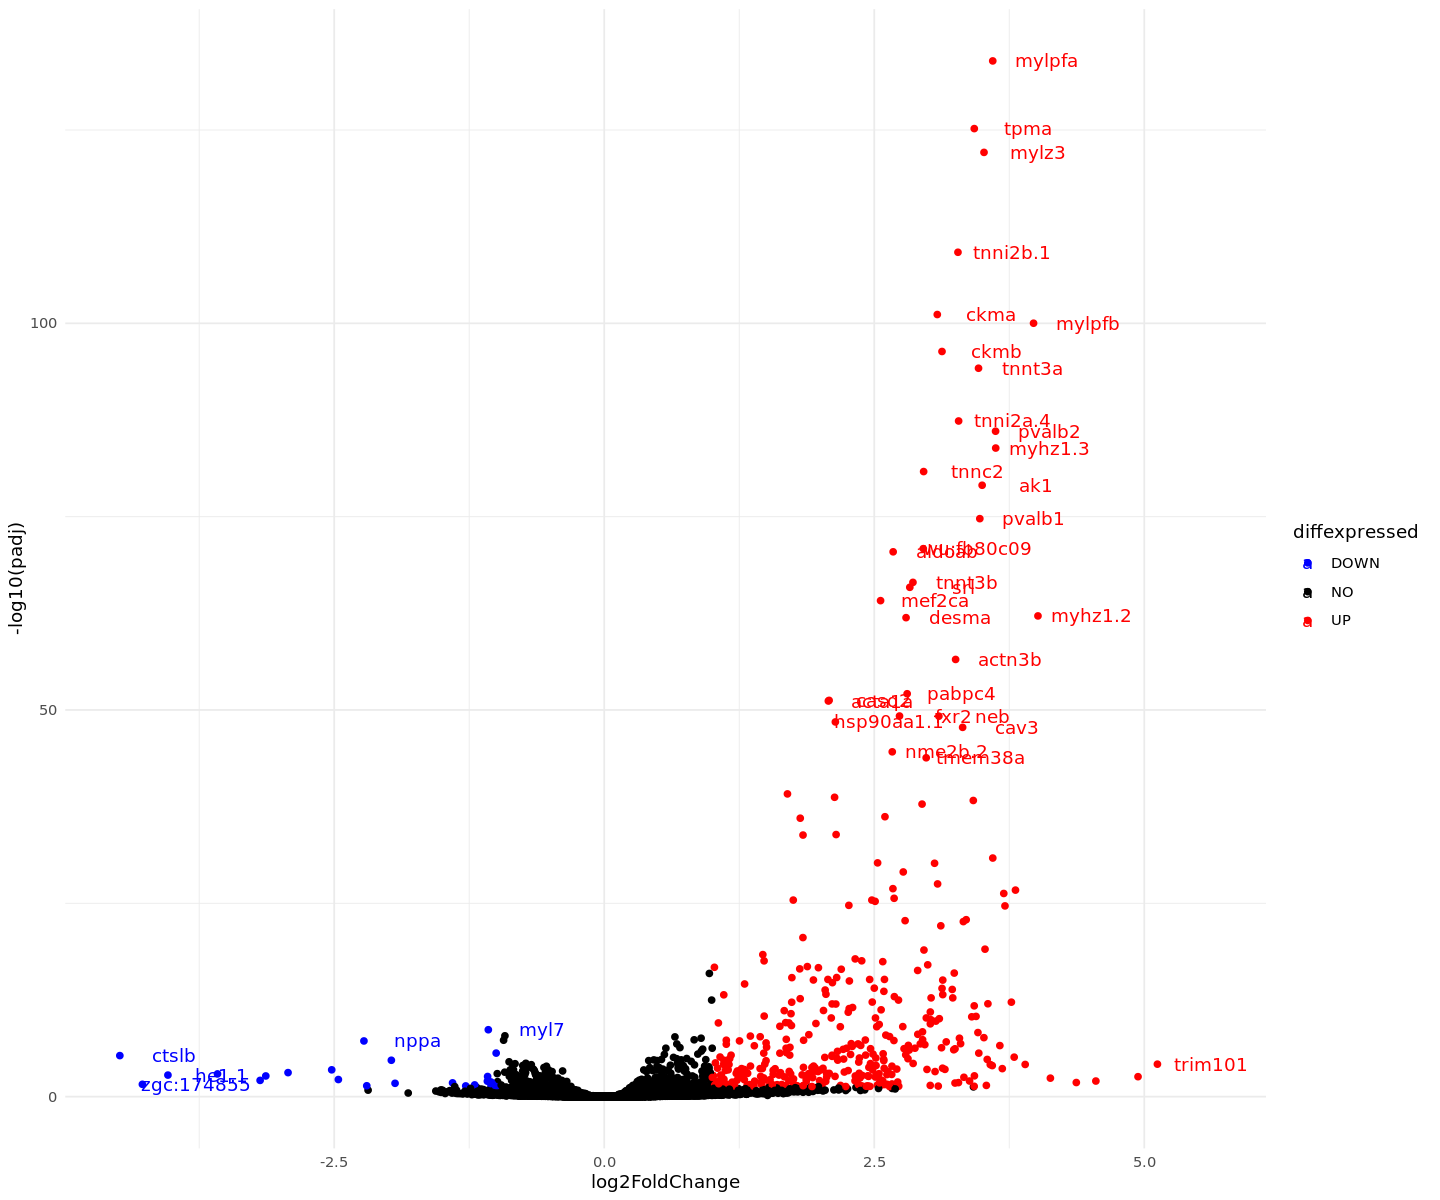

Saving 6.67 x 6.67 in image

Warning message:
“Removed 8633 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“Removed 8633 rows containing missing values (geom_text).”
Saving 6.67 x 6.67 in image



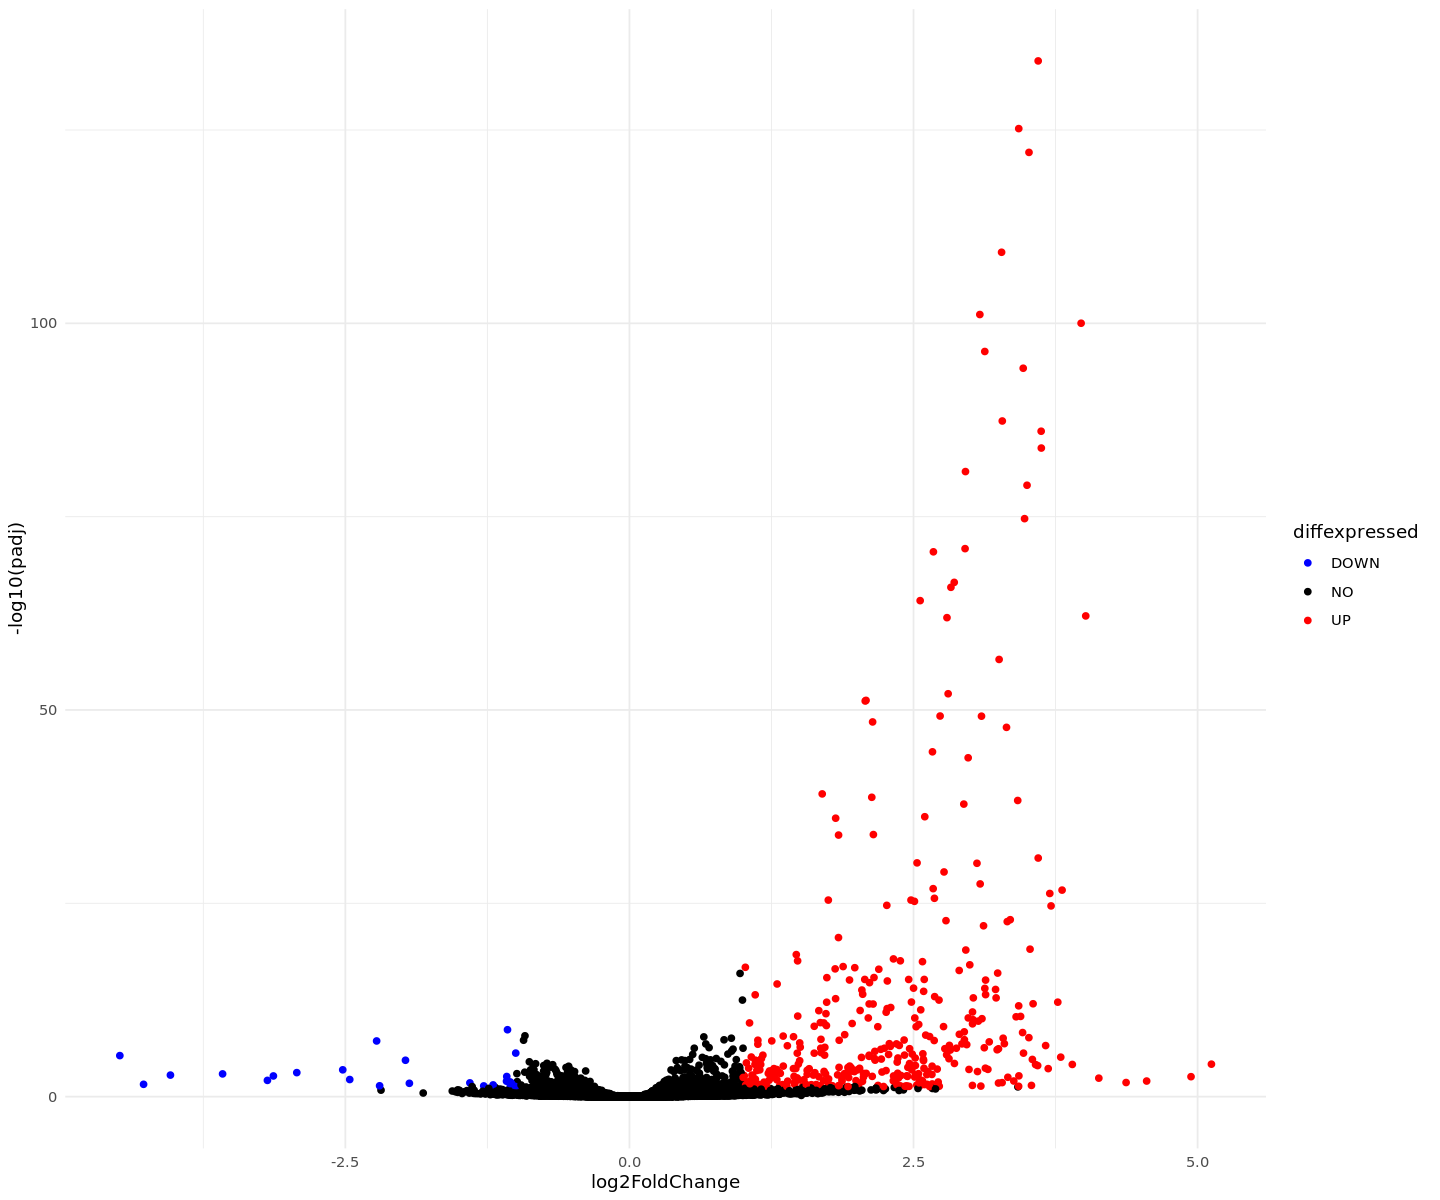

In [40]:
de<-data.frame(subset(res, padj != 0))
dim(de)
de$delabel <- NA
de$symbol <- as.factor(de$symbol)
# add a column of NAs
de$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
# if log2Foldchange < -1 and pvalue < 0.05, set as "DOWN"
de$diffexpressed[de$log2FoldChange < -1 & de$padj < 0.05] <- "DOWN"
#de$diffexpressed[de$log2FoldChange > 1 & de$padj < 0.05] <- "UP"
#de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <-"UP"
de$delabel[de$log2FoldChange > 5 | -log10(de$padj) > 40] <- as.character(de$symbol[de$log2FoldChange > 5 | -log10(de$padj) > 40])
de$delabel[(de$log2FoldChange < -4) | (de$log2FoldChange < -1 & -log10(de$padj) > 7)] <- as.character(de$symbol[(de$log2FoldChange < -4) | (de$log2FoldChange < -1 & -log10(de$padj) > 7)])
plot<-ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed, label=delabel)) + 
    geom_point() + 
    theme_minimal() +
    geom_text(nudge_x = 0.5) +
scale_color_manual(values=c("blue", "black", "red"))
plot2<-ggplot(data=de, aes(x=log2FoldChange, y=-log10(padj), col=diffexpressed)) + 
    geom_point() + 
    theme_minimal()+
scale_color_manual(values=c("blue", "black", "red"))
plot
plot2
#ggsave(filename = "deseq2_trimmed_outputs_CELseq_bleb/volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot)
ggsave(filename = "deseq2_trimmed_outputs_CELseq_bleb/celseq_volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot)
ggsave(filename = "deseq2_trimmed_outputs_CELseq_bleb/celseq_nolab_volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot2)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_CELseq_bleb/celseq_volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot)
ggsave(filename = "macrogen_and_celseq_analysisv2_200824/deseq2_CELseq_bleb/celseq_nolab_volcanoallDElogFC1padj0.05_blebb_dmso.pdf", plot=plot2)

### Write out table with differentially expression genes

In [44]:
resSigOrdered <- resSig[order(-resSig$log2FoldChange),]
resSigOrderedDF <- as.data.frame(resSigOrdered)
head(resSigOrderedDF)
write.csv(resSigOrderedDF, file = "deseq2_trimmed_outputs_CELseq_bleb/resultsDElogFC1DEpadj0.05_bleb_dmso.csv")
write.csv(resSigOrderedDF, file = "macrogen_and_celseq_analysisv2_200824/deseq2_CELseq_bleb/celseq_resultsDElogFC1DEpadj0.05_bleb_dmso.csv")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000018264,16.987005,5.121631,1.072430,4.775727,1.790588e-06,6.336488e-05,trim101,445187
ENSDARG00000046079,8.307623,4.942081,1.284383,3.847825,1.191710e-04,2.635746e-03,cacng6b,100003220
ENSDARG00000045633,6.260533,4.551674,1.311235,3.471288,5.179675e-04,9.636864e-03,asb15a,100151067
ENSDARG00000059003,5.616938,4.370665,1.312627,3.329707,8.693732e-04,1.501487e-02,strip2,556392
ENSDARG00000033854,8.866781,4.130721,1.109090,3.724423,1.957621e-04,4.079946e-03,abrab,445477
ENSDARG00000067995,227.490387,4.015623,0.234884,17.096195,1.584144e-65,6.867264e-63,myhz1.2,799300


In [45]:
save.image(file = "DESeq2_trimmed_notebook_CELseq_bleb.RData")